# Purpose 

#### The purpose of this project is to get practice plotting univariate data sets. I used a diamond dataset from seaborn and started with basic statistic functions and moved on to creating graphs

### Dispersion, Central Tendency, Frequency

In [30]:
#load in all packages required to plot and compute
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load diamond data set 
data = sns.load_dataset('diamonds')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
#measures of central tendency
import statistics

a1=data['price'].mean()
b1=data['price'].median()
c1= statistics.mode(data['price'])
d1=data['price'].std()
e1=data['price'].var()
f1=data['price'].skew()
g1=data['price'].kurt()
h1= data['price'].min()
i1=data['price'].max()

priceData = {'Mean': [a1],
       'Median': [b1],
       'Mode': [c1],
        'Standard_Deviation': [d1],
        'Variance': [e1],
        'Skew':[f1],
        'Kurtosis':[g1],
        'Minimum':[h1],
        'Maximum':[i1]
            }
pricedf= pd.DataFrame(priceData, index=['price'])

In [4]:
pricedf

,Mean,Median,Mode,Standard_Deviation,Variance,Skew,Kurtosis,Minimum,Maximum
price,3932.799722,2401.0,605,3989.439738,1.591563e+07,1.618395,2.177696,326,18823


In [5]:
#Description of price
result = data.describe()
result['price']

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

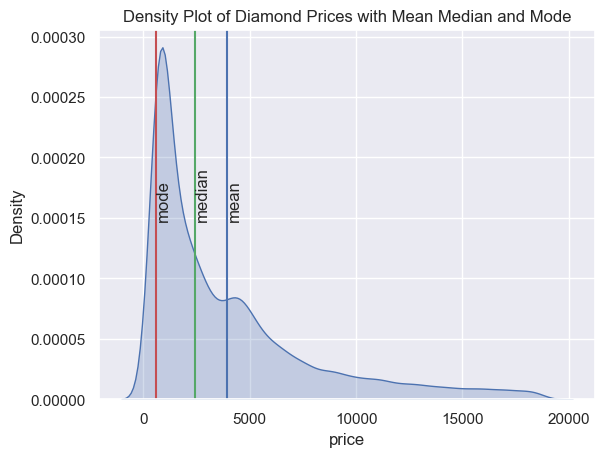

In [32]:
#plot graph of price with mean median mode
sns.set_theme(color_codes=True)
sns.kdeplot(data['price'], fill=True)

plt.axvline(data['price'].mean(),0,1, label='mean')
plt.text(data['price'].mean(),0.00015,'mean',rotation=90)

plt.axvline(statistics.mode(data['price']),0,1, label='mode',color='r')
plt.text(statistics.mode(data['price']),0.00015,'mode',rotation=90)

plt.axvline(data['price'].median(),0,1, label='median', color='g')
plt.text(data['price'].median(),0.00015,'median',rotation=90)
plt.title('Density Plot of Diamond Prices with Mean Median and Mode')



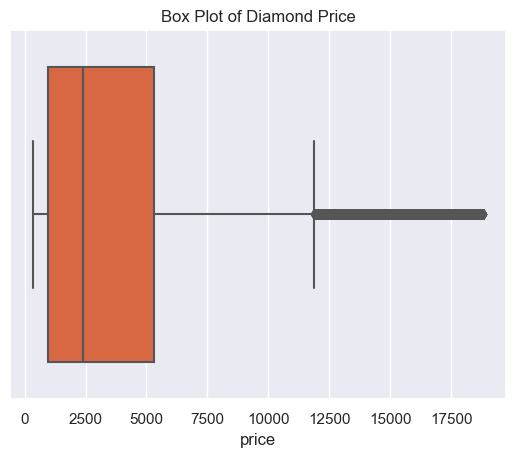

In [33]:
#box plot
p = sns.boxplot(x=data['price'],
               palette=['#F15B2A']).set(title='Box Plot of Diamond Price')


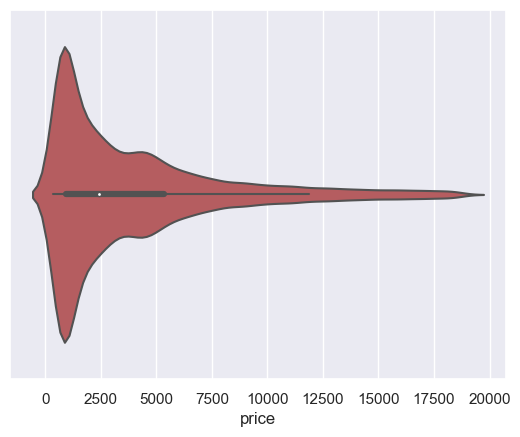

In [8]:
#Violin plot
p=sns.violinplot(x=data['price'],
                palette=['r'])


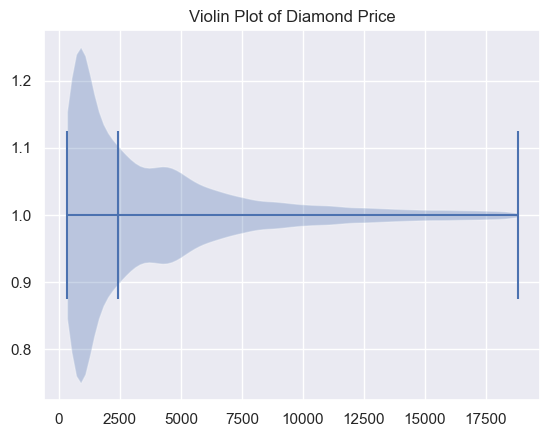

In [34]:
# Using matplotlib to change elements properties

parts = plt.violinplot(data['price'],
                      vert=False,
                      showmeans=False,
                      showmedians=True,
                      )
plt.title('Violin Plot of Diamond Price')



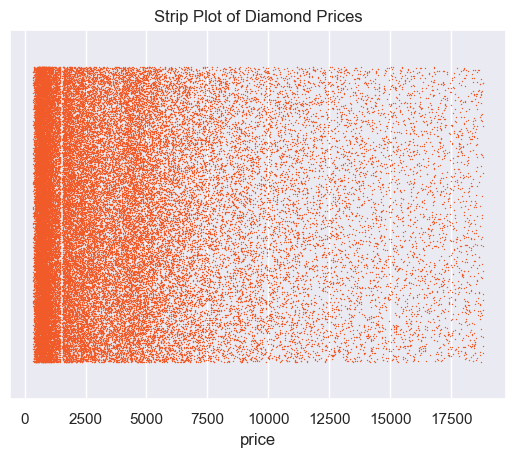

In [31]:
#strip plot of prices
p1 = sns.stripplot(x = data['price'],
                  color = '#F15B2A',
                  jitter = .4,
                  size = 1).set(title='Strip Plot of Diamond Prices')

plt.savefig('C:/Users/aerap/OneDrive/Documents/GitHub/aerapp09.github.io/Official/images/my_plot4.png')


In [11]:
#Using 'Cut' as univeriate variable
#Find the sum total of each variable in 'cut'

data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [12]:
#Turn the values in decimal percentage of total
dataCut_percentof = data['cut'].value_counts(1)
dataCut_percentof

Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: cut, dtype: float64

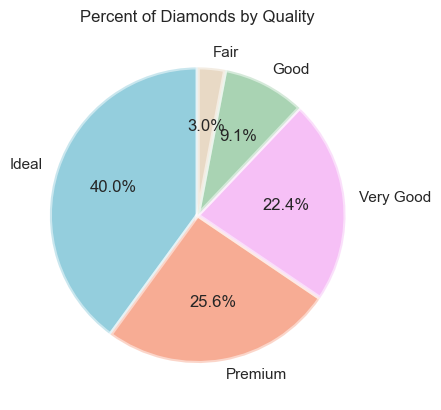

In [24]:
#Use pie chart to plot percent distribution of 'cut'
plt.title('Percent of Diamonds by Quality')
piechart_cut = plt.pie(data['cut'].value_counts(1),
                       startangle=90,
                       autopct='%1.1f%%',
                       colors=['#2A9FBC', '#F15B2A', 'violet', 'g','tan'],
                       wedgeprops={'linewidth':3, 'alpha':0.5},
                        labels=(['Ideal', 'Premium', 'Very Good', 'Good','Fair']))



In [14]:
#Manually find the percentage of total of each 

total = data['cut'].value_counts().sum()

for i in data['cut'].value_counts():
    y= '{:.2f}'.format((i / total)*100)
    print(y)

39.95
25.57
22.40
9.10
2.98


In [15]:
dataCut_percentof

Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: cut, dtype: float64

In [16]:
#convert the variable df into a dictionary

dataCut_df= dict(dataCut_percentof)
dataCut_df

{'Ideal': 0.3995365220615499,
 'Premium': 0.2556729699666296,
 'Very Good': 0.22398961809417872,
 'Good': 0.09095291064145347,
 'Fair': 0.029847979236188357}

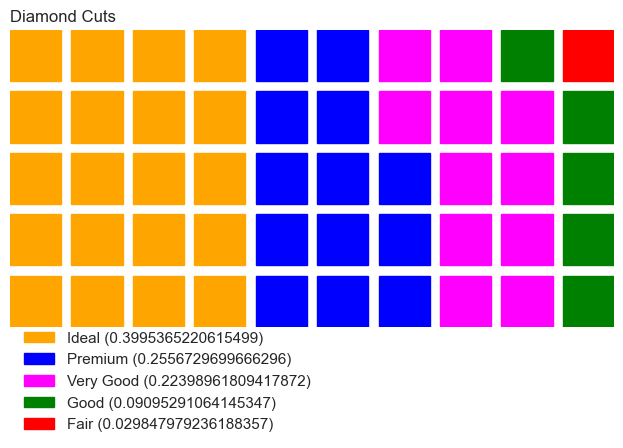

In [17]:
#Waffle chart

from pywaffle import Waffle
fig = plt.figure(
        FigureClass=Waffle,
        rows=5,
        columns=10,
        values=dataCut_df,
        colors=('orange','blue','magenta','green','red'),
        title={'label': 'Diamond Cuts', 'loc':'left'},
        labels=['{0} ({1})'.format(k, v) for k, v in dataCut_df.items()],
        legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4),'framealpha': 0}
        )